In [1]:
# test_1_data_processor.py
import numpy as np
import pandas as pd
from pathlib import Path
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
from basic_coint import PairsDataProcessor

def test_data_processor():
    # Initialize the data processor
    DATA_FOLDER = Path('/Users/mouyasushi/k_data/永豐')  # Update with your actual path
    processor = PairsDataProcessor(DATA_FOLDER)   # class : pairs data processor 

    # Test loading a single stock
    test_file = next(DATA_FOLDER.glob('*.csv'))
    stock_data = processor.load_stock_data(test_file.stem, test_file)   # load_stock_data()
    print("\n=== Single stock data sample ===")
    print(stock_data.head())

    # Test daily resampling
    start_date = '2024-6-12'
    end_date = '2024-10-14'
    trading_days = mcal.get_calendar('XTAI').schedule(
        start_date=start_date,
        end_date=end_date
    ).index

    daily_data = processor.resample_to_daily(stock_data, trading_days)    # resample_to_daily() 
    print("\n=== Resampled daily data ===")
    print(daily_data.head())

    # Test full data combination
    print("\n=== Testing full data combination ===")
    combined_data = processor.combine_stock_data(start_date, end_date)
    print("Combined data shape:", combined_data.shape)
    print("\nSample of combined data:")
    print(combined_data.head())
    
    return combined_data

if __name__ == "__main__":
    test_data_processor()


=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-06-12  56.900002
2024-06-13  56.900002
2024-06-14  57.000000
2024-06-17  57.299999
2024-06-18  57.200001

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:113: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')



=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-06-12  56.900002
2024-06-13  56.900002
2024-06-14  57.000000
2024-06-17  57.299999
2024-06-18  57.200001

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:113: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


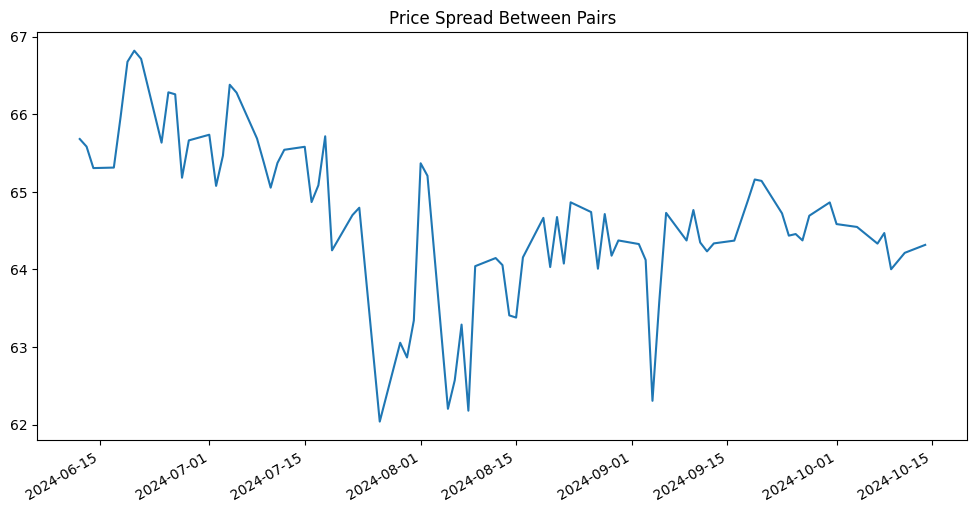

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_trading_strategy(combined_data):
    print("\n=== Testing Trading Strategy ===")
    
    # Initialize the strategy
    strategy = PairsTradingStrategy()

    # Select two stocks for testing
    stock1 = combined_data.iloc[:, 0]
    stock2 = combined_data.iloc[:, 1]

    # Test data preparation
    stock1_clean, stock2_clean = strategy.prepare_pair_data(stock1, stock2)
    print("\nClean data samples:")
    print(pd.DataFrame({'Stock1': stock1_clean.head(), 'Stock2': stock2_clean.head()}))

    # Test hedge ratio calculation
    hedge_ratio = strategy.calculate_hedge_ratio(stock1_clean, stock2_clean)
    print(f"\nCalculated hedge ratio: {hedge_ratio}")

    # Calculate and visualize spread
    spread = stock1_clean - hedge_ratio * stock2_clean
    print("\nSpread statistics:")
    print(spread.describe())

    # Plot spread
    plt.figure(figsize=(12, 6))
    spread.plot()
    plt.title('Price Spread Between Pairs')
    plt.show()
    
    return stock1_clean, stock2_clean, hedge_ratio, spread

if __name__ == "__main__":
    combined_data = test_data_processor()
    test_trading_strategy(combined_data)


=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-06-12  56.900002
2024-06-13  56.900002
2024-06-14  57.000000
2024-06-17  57.299999
2024-06-18  57.200001

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:113: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


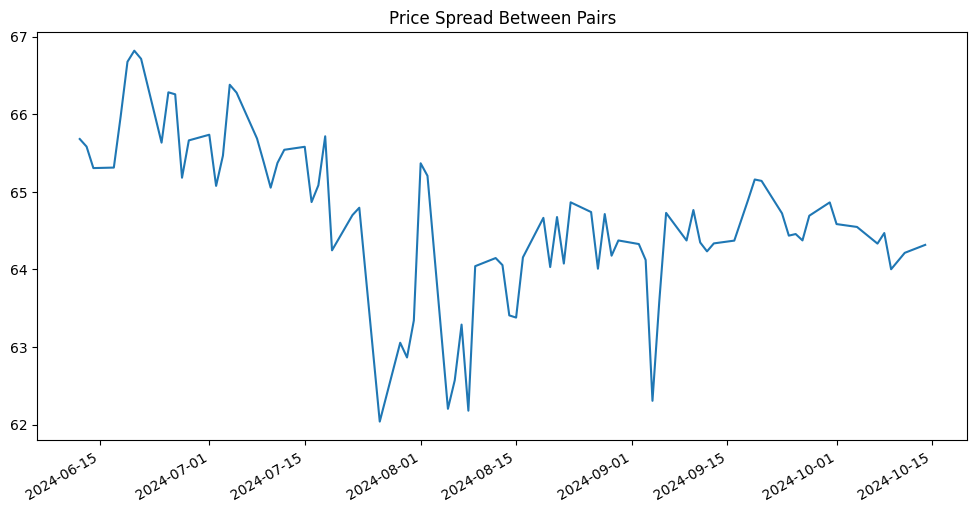


=== Testing Signals and Returns ===
Z-score statistics:
count    23.000000
mean      0.077218
std       0.281357
min      -0.344888
25%      -0.116131
50%       0.023414
75%       0.230720
max       0.622405
dtype: float64


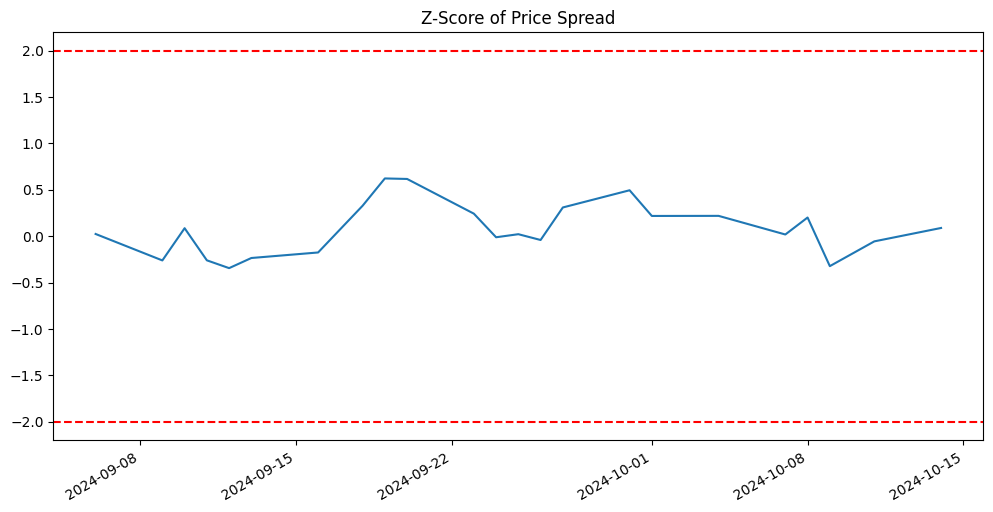


Signal statistics:
0    83
Name: count, dtype: int64


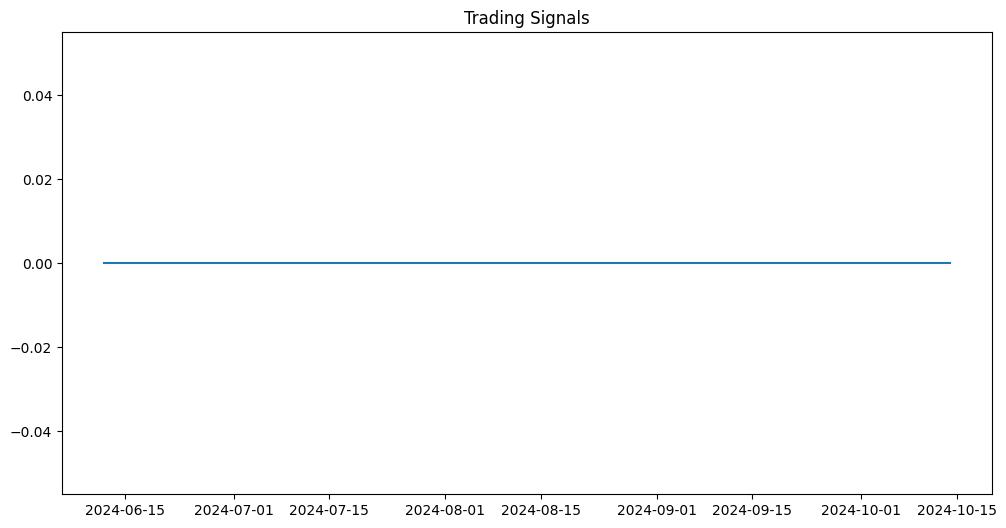


Returns statistics:
count    82.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%      -0.0
75%       0.0
max       0.0
dtype: float64


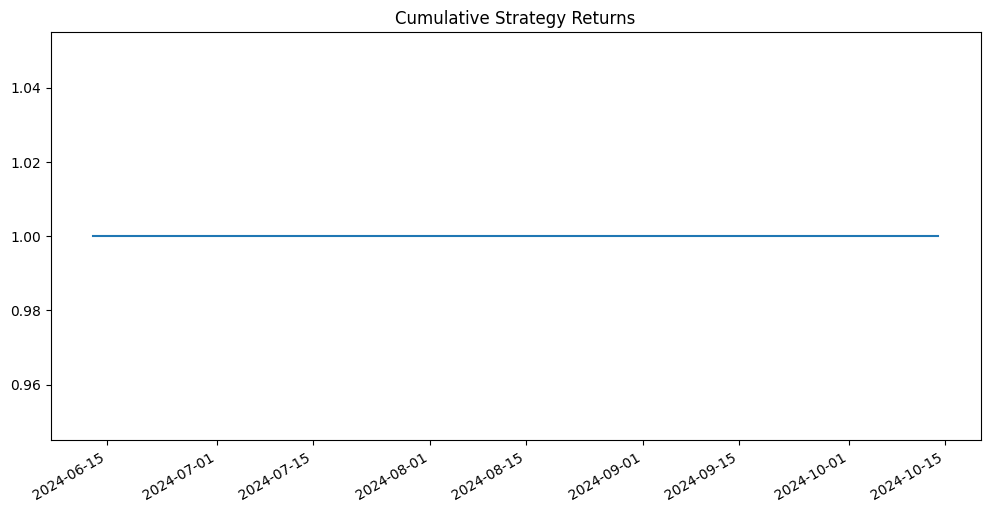

In [3]:
# test_3_signals_and_returns.py
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_signals_and_returns(stock1_clean, stock2_clean, hedge_ratio, spread):
    print("\n=== Testing Signals and Returns ===")
    
    strategy = PairsTradingStrategy()

    # Test z-score calculation
    zscore = strategy.calculate_zscore(spread)
    print("Z-score statistics:")
    print(zscore.describe())

    # Plot z-score
    plt.figure(figsize=(12, 6))
    zscore.plot()
    plt.axhline(y=2.0, color='r', linestyle='--')
    plt.axhline(y=-2.0, color='r', linestyle='--')
    plt.title('Z-Score of Price Spread')
    plt.show()

    # Test signal generation
    signals = strategy.generate_signals(zscore)
    print("\nSignal statistics:")
    print(pd.Series(signals).value_counts())

    # Plot signals
    plt.figure(figsize=(12, 6))
    plt.plot(signals.index, signals)
    plt.title('Trading Signals')
    plt.show()

    # Test returns calculation
    pair_data = pd.concat([stock1_clean, stock2_clean], axis=1)
    returns = strategy.calculate_returns(pair_data, signals, hedge_ratio)
    print("\nReturns statistics:")
    print(returns.describe())

    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    (1 + returns).cumprod().plot()
    plt.title('Cumulative Strategy Returns')
    plt.show()
    
    return returns, signals, zscore

if __name__ == "__main__":
    combined_data = test_data_processor()
    stock1_clean, stock2_clean, hedge_ratio, spread = test_trading_strategy(combined_data)
    test_signals_and_returns(stock1_clean, stock2_clean, hedge_ratio, spread)

In [4]:
# test_4_complete_execution.py
import pandas as pd
import matplotlib.pyplot as plt
from basic_coint import PairsTradingStrategy

def test_complete_execution(combined_data):
    print("\n=== Testing Complete Pair Trading Execution ===")
    
    strategy = PairsTradingStrategy()
    
    # Get first pair of stocks
    stock1_code = combined_data.columns[0]
    stock2_code = combined_data.columns[1]

    result = strategy.execute_pair_trade(
        combined_data[stock1_code],
        combined_data[stock2_code],
        (stock1_code, stock2_code)
    )

    if result:
        print(f"\nTrading results for pair {result.pair}:")
        print(f"Period: {result.start_date} to {result.end_date}")
        print("\nMetrics:")
        for metric, value in result.metrics.items():
            print(f"{metric}: {value:.4f}")
            
        # Plot positions and returns
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        result.positions['zscore'].plot(ax=ax1)
        ax1.axhline(y=2.0, color='r', linestyle='--')
        ax1.axhline(y=-2.0, color='r', linestyle='--')
        ax1.set_title('Z-Score and Trading Signals')
        
        (1 + result.returns).cumprod().plot(ax=ax2)
        ax2.set_title('Cumulative Returns')
        
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    combined_data = test_data_processor()
    test_complete_execution(combined_data)


=== Single stock data sample ===
                         Close
ts                            
2021-10-14 09:01:00  53.700001
2021-10-14 09:02:00  53.700001
2021-10-14 09:03:00  53.700001
2021-10-14 09:04:00  53.700001
2021-10-14 09:05:00  53.599998

=== Resampled daily data ===
                Close
2024-06-12  56.900002
2024-06-13  56.900002
2024-06-14  57.000000
2024-06-17  57.299999
2024-06-18  57.200001

=== Testing full data combination ===
Found 332 CSV files
Loading progress: 3.0% (10/332 files)
Loading progress: 6.0% (20/332 files)
Loading progress: 9.0% (30/332 files)
Loading progress: 12.0% (40/332 files)
Loading progress: 15.1% (50/332 files)
Loading progress: 18.1% (60/332 files)
Loading progress: 21.1% (70/332 files)
Loading progress: 24.1% (80/332 files)
Loading progress: 27.1% (90/332 files)
Loading progress: 30.1% (100/332 files)
Loading progress: 33.1% (110/332 files)
Loading progress: 36.1% (120/332 files)
Loading progress: 39.2% (130/332 files)
Loading progress: 42

/Users/mouyasushi/Desktop/pair_trading/basic_coint.py:113: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
